In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _task1 as _task1

In [4]:
def identifyVariables():
    #Load the data
    dataset = _task1.preProcessingOfData()
    #get an overview of the data
    dataset.head()
    dataset.tail()
    dataset.sample(10)

    #identify variable type
    dataset.dtypes
    dataset.info()
    dataset.describe()

In [8]:
identifyVariables()

=> Take a look at the first few rows
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


=> Header tbl:  mileage(analysed before), make,   model,  fuel,  gear, offerType,  price,   hp,  year
0    False
1    False
2    False
3    False
4    False
Name: make, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name: model, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name:

=> Take a look at the first few rows
   mileage        make   model      fuel    gear offerType  price     hp  year
0   235000         BMW     316    Diesel  Manual      Used   6800  116.0  2011
1    92800  Volkswagen    Golf  Gasoline  Manual      Used   6877  122.0  2011
2   149300        SEAT    Exeo  Gasoline  Manual      Used   6900  160.0  2011
3    96200     Renault  Megane  Gasoline  Manual      Used   6950  110.0  2011
4   156000     Peugeot     308  Gasoline  Manual      Used   6950  156.0  2011
mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64


=> Header tbl:  mileage(analysed before), make,   model,  fuel,  gear, offerType,  price,   hp,  year
0    False
1    False
2    False
3    False
4    False
Name: make, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name: model, dtype: bool 0    False
1    False
2    False
3    False
4    False
Name:

<AxesSubplot:>

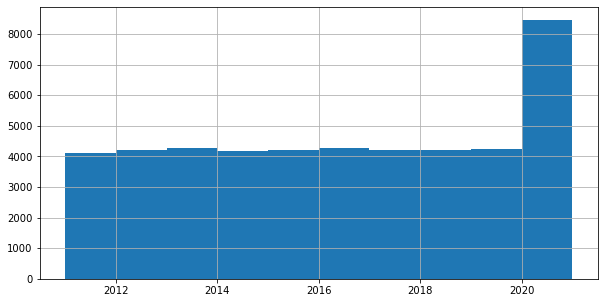

In [19]:
#univariate analysis 

#summary statistics of the data
include =['object', 'float', 'int'] 
dataset = _task1.preProcessingOfData()
dataset.describe(include=include)
dataset.describe()

#count of values in a categorical variable
dataset.price.value_counts()
dataset.year.hist(figsize=(10,5))

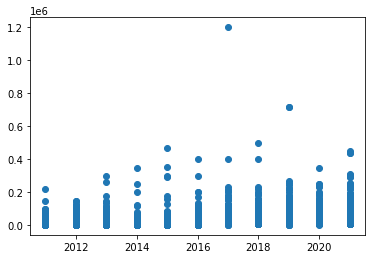

In [20]:
#UNIVARIATE SCATTER PLOT
plt.scatter(dataset['year'],dataset['price'])
plt.show()

In [21]:
#Bivariate analysis
#create correlation matrix
dataset.corr()

,mileage,price,hp,year
mileage,1.000000,-0.303255,-0.015086,-0.677564
price,-0.303255,1.000000,0.747617,0.405526
hp,-0.015086,0.747617,1.000000,0.167232
year,-0.677564,0.405526,0.167232,1.000000


In [23]:
import statsmodels.api as sm
#Simple Linear Regression

#define response variable
y = dataset['price']

#define explanatory variable
x = dataset[['year']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     9127.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        01:14:33   Log-Likelihood:            -5.1929e+05
No. Observations:               46376   AIC:                         1.039e+06
Df Residuals:                   46374   BIC:                         1.039e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.987e+06   5.24e+04    -95.220      0.0

C:\Users\Qendrim Demiraj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


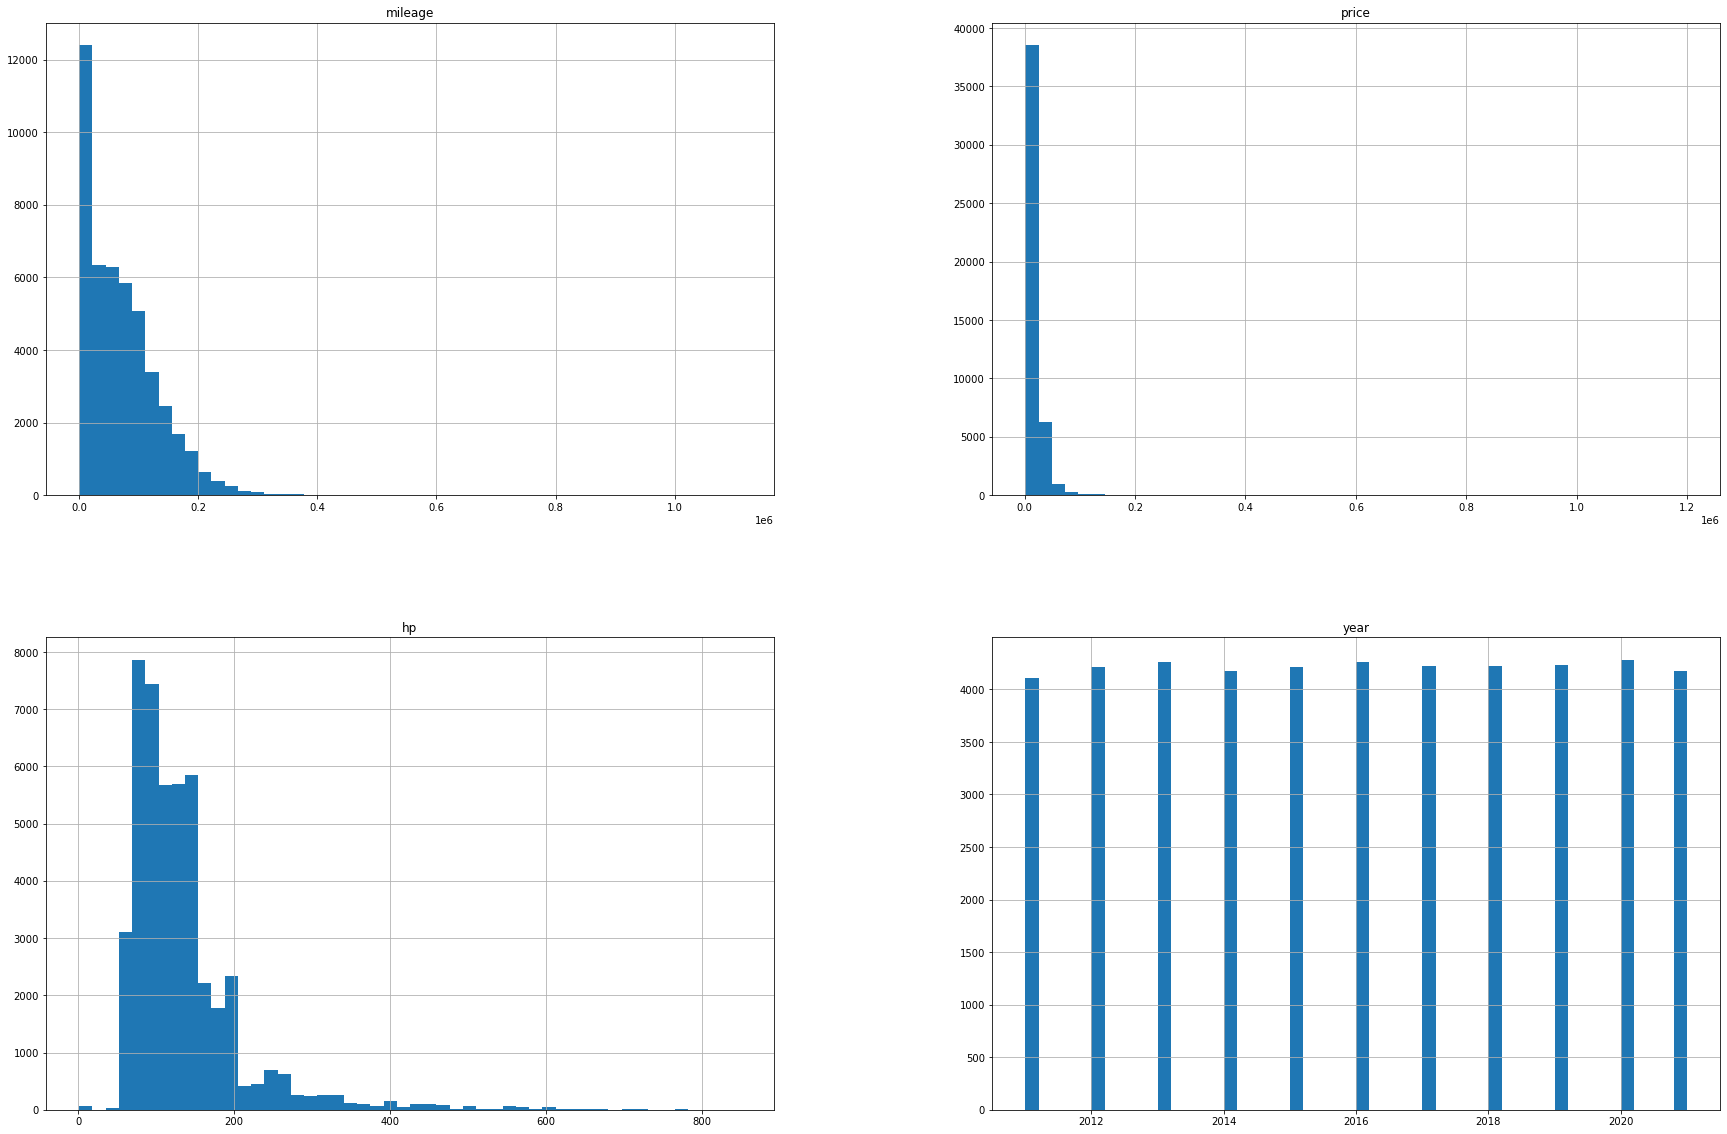

In [30]:
dataset.hist(bins=50, figsize=(30,20));